In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#load dữ liệu
cereal_df = pd.read_csv('https://raw.githubusercontent.com/CodexploreRepo/data-science/main/Code/A6_Seaborn/data/cereal.csv')

In [28]:
#xem 5 dòng đầu tiên của data frame
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [29]:
#Xem một số thông số thống kê
cereal_df.describe()
# bảng thống kê này cho thấy một số loại ngũ cốc có hàm lượng carbo, sugars, potass < 0.
# điều này không hợp lý, vì vậy ta sẽ thay hững giá trị âm này bằng 0

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [31]:
#Thay các giá trị carbo <0 bằng 0
for x in cereal_df.index:
    if cereal_df.loc[x, 'carbo'] <0:
        cereal_df.loc[x, 'carbo']=0
#xem min của carbo:
cereal_df['carbo'].min()

0.0

In [32]:
#Thay các giá trị sugars <0 bằng 0
for x in cereal_df.index:
    if cereal_df.loc[x, 'sugars'] <0:
        cereal_df.loc[x, 'sugars']=0
#xem min của sugars:
cereal_df['sugars'].min()

0

In [33]:
#Thay giá trị potass < 0 bằng 0
for x in cereal_df.index:
    if cereal_df.loc[x, 'potass'] <0:
        cereal_df.loc[x, 'potass']=0
#xem min của potass:
cereal_df['potass'].min()

0

In [34]:
cereal_df.info()
# cereal_df có 77 hàng, không có giá trị null, không có cột nào cần thay đổi kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


[Text(0.5, 1.0, 'vitamins')]

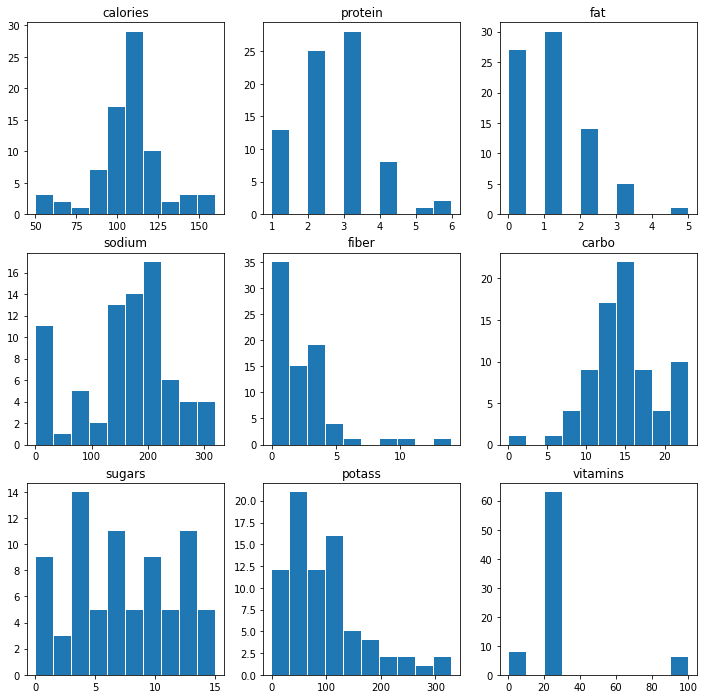

In [45]:
# vẽ biểu đồ phân phối cho 9 loại dưỡng chất: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(figsize=(12, 12), nrows=3, ncols=3)

ax1.hist(cereal_df.calories, rwidth=0.95)
ax1.set(title='calories')

ax2.hist(cereal_df.protein, rwidth=0.95)
ax2.set(title='protein')

ax3.hist(cereal_df.fat, rwidth=0.95)
ax3.set(title='fat')

ax4.hist(cereal_df.sodium, rwidth=0.95)
ax4.set(title='sodium')

ax5.hist(cereal_df.fiber, rwidth=0.95)
ax5.set(title='fiber')

ax6.hist(cereal_df.carbo, rwidth=0.95)
ax6.set(title='carbo')

ax7.hist(cereal_df.sugars, rwidth=0.95)
ax7.set(title='sugars')

ax8.hist(cereal_df.potass, rwidth=0.95)
ax8.set(title='potass')

ax9.hist(cereal_df.vitamins, rwidth=0.95)
ax9.set(title='vitamins')

In [47]:
#Vẽ biểu đồ heatmap thể hiện mối tương quan giữa các chất dinh dưỡng

#tính hệ số tương quan
cereal_corr = cereal_df.corr()

cereal_corr


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.252349,0.564092,-0.066678,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.125337,-0.324112,0.549667,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318504,0.275086,0.193371,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.353990,0.096291,-0.032706,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.359297,-0.141225,0.903647,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.252349,-0.125337,-0.318504,0.353990,-0.359297,1.000000,-0.352835,-0.352861,0.257065,-0.107424,0.136016,0.365930,0.054436
sugars,0.564092,-0.324112,0.275086,0.096291,-0.141225,-0.352835,1.000000,0.022151,0.122000,0.096623,0.452308,-0.034450,-0.761732
potass,-0.066678,0.549667,0.193371,-0.032706,0.903647,-0.352861,0.022151,1.000000,0.020449,0.360974,0.416439,-0.495357,0.380534
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.257065,0.122000,0.020449,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.107424,0.096623,0.360974,0.299262,1.000000,0.190762,-0.335269,0.025159


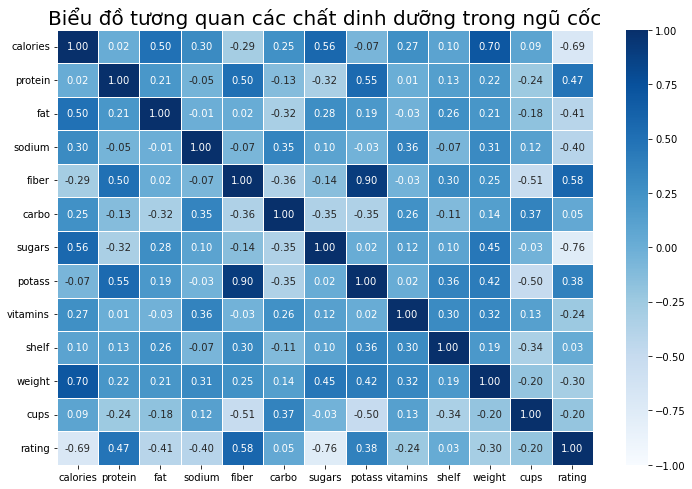

In [54]:
#sử dụng seaborn để vẽ biểu đồ tương quan
fig, (ax)=plt.subplots(figsize=(12,8))
sns.heatmap(cereal_corr, cmap='Blues', annot=True, fmt='.2f', vmin=-1, vmax=1, linecolor='white', linewidth= 0.5)
ax.set_title('Biểu đồ tương quan các chất dinh dưỡng trong ngũ cốc', fontsize=20);